### Complete case analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [8]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [10]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

### It shows how many %age of data values are missing in column 

### CCA can apply when the missing data is less the 5%

### CCA means removing the rows 

In [11]:
df.shape

(19158, 13)

### These are the column in which less than 5% data is missing

In [13]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [22]:
df[cols].sample(3)

,city_development_index,enrolled_university,education_level,experience,training_hours
13947,0.682,no_enrollment,Graduate,20.0,83.0
8074,0.920,Part time course,Graduate,17.0,77.0
954,0.920,no_enrollment,Graduate,5.0,13.0


In [23]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [24]:
df['enrolled_university'].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [26]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

### It shows 89% data is still remaining in the data 

In [27]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

### Histogram deal numarical values

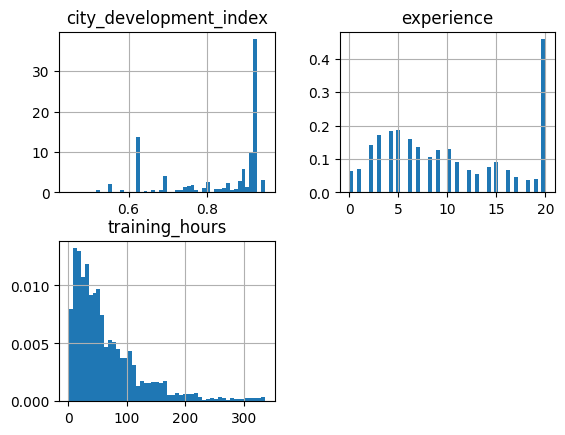

In [32]:
new_df.hist(bins=50,density=True)
plt.show()

<Axes: >

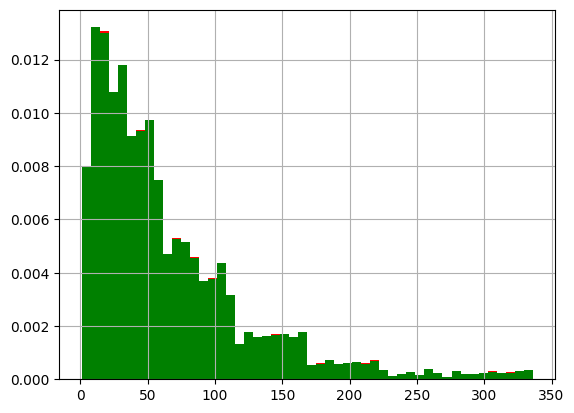

In [34]:
# original_data
df['training_hours'].hist(bins=50,density=True,color='red')

# data after cca
new_df['training_hours'].hist(bins=50,density=True,color='green')

<Axes: >

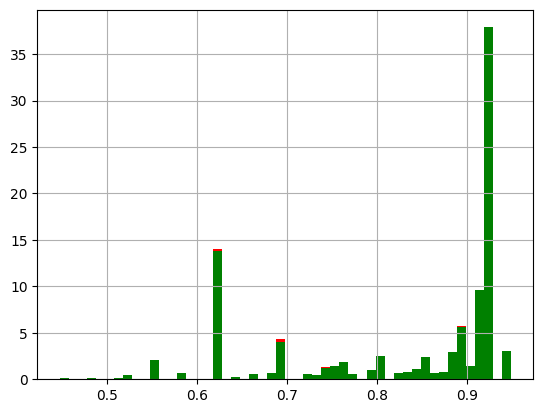

In [35]:
# original_data
df['city_development_index'].hist(bins=50,density=True,color='red')

# data after cca
new_df['city_development_index'].hist(bins=50,density=True,color='green')

<Axes: >

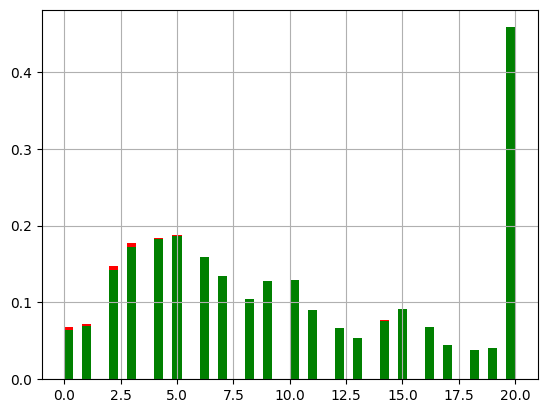

In [37]:
# original_data
df['experience'].hist(bins=50,density=True,color='red')

# data after cca
new_df['experience'].hist(bins=50,density=True,color='green')

In [38]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079
